# GroundingDINO

In [1]:
!git clone https://github.com/IDEA-Research/GroundingDINO.git
%cd GroundingDINO
!git checkout -q 57535c5a79791cb76e36fdb64975271354f10251
!pip install -q -e .

Cloning into 'GroundingDINO'...
remote: Enumerating objects: 401, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 401 (delta 51), reused 44 (delta 44), pack-reused 325
Receiving objects: 100% (401/401), 12.84 MiB | 28.91 MiB/s, done.
Resolving deltas: 100% (204/204), done.
/content/GroundingDINO
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 49.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 93.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 88.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 78.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 29.8 MB/s eta 0:00:00


In [2]:
!pip uninstall -y supervision
!pip install -q supervision==0.6.0

import supervision as svn
print(svn.__version__)

Found existing installation: supervision 0.4.0
Uninstalling supervision-0.4.0:
  Successfully uninstalled supervision-0.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
groundingdino 0.1.0 requires supervision==0.4.0, but you have supervision 0.6.0 which is incompatible.
0.6.0


In [3]:
import os

GROUNDING_DINO_CONFIG_PATH = os.path.join("groundingdino/config/GroundingDINO_SwinT_OGC.py")
print(GROUNDING_DINO_CONFIG_PATH, "; exist:", os.path.isfile(GROUNDING_DINO_CONFIG_PATH))
!mkdir -p weights
%cd weights

!wget -q https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth
import os
%cd /content/GroundingDINO
GROUNDING_DINO_CHECKPOINT_PATH = os.path.join("weights/groundingdino_swint_ogc.pth")
print(GROUNDING_DINO_CHECKPOINT_PATH, "; exist:", os.path.isfile(GROUNDING_DINO_CHECKPOINT_PATH))

groundingdino/config/GroundingDINO_SwinT_OGC.py ; exist: True
/content/GroundingDINO/weights
/content/GroundingDINO
weights/groundingdino_swint_ogc.pth ; exist: True


In [4]:
import torch

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [5]:
from groundingdino.util.inference import Model

grounding_dino_model = Model(model_config_path=GROUNDING_DINO_CONFIG_PATH, model_checkpoint_path=GROUNDING_DINO_CHECKPOINT_PATH)

/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased


In [8]:
!mkdir -p data

In [93]:
SOURCE_IMAGE_PATH = "/content/GroundingDINO/data/nt.jpeg"
CLASSES = ['table','headphones','wallet','cup','spoon','bottle','bottle cap','hat','book','straw','key','tv remote'] #add the class name to be labeled automatically
BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.15

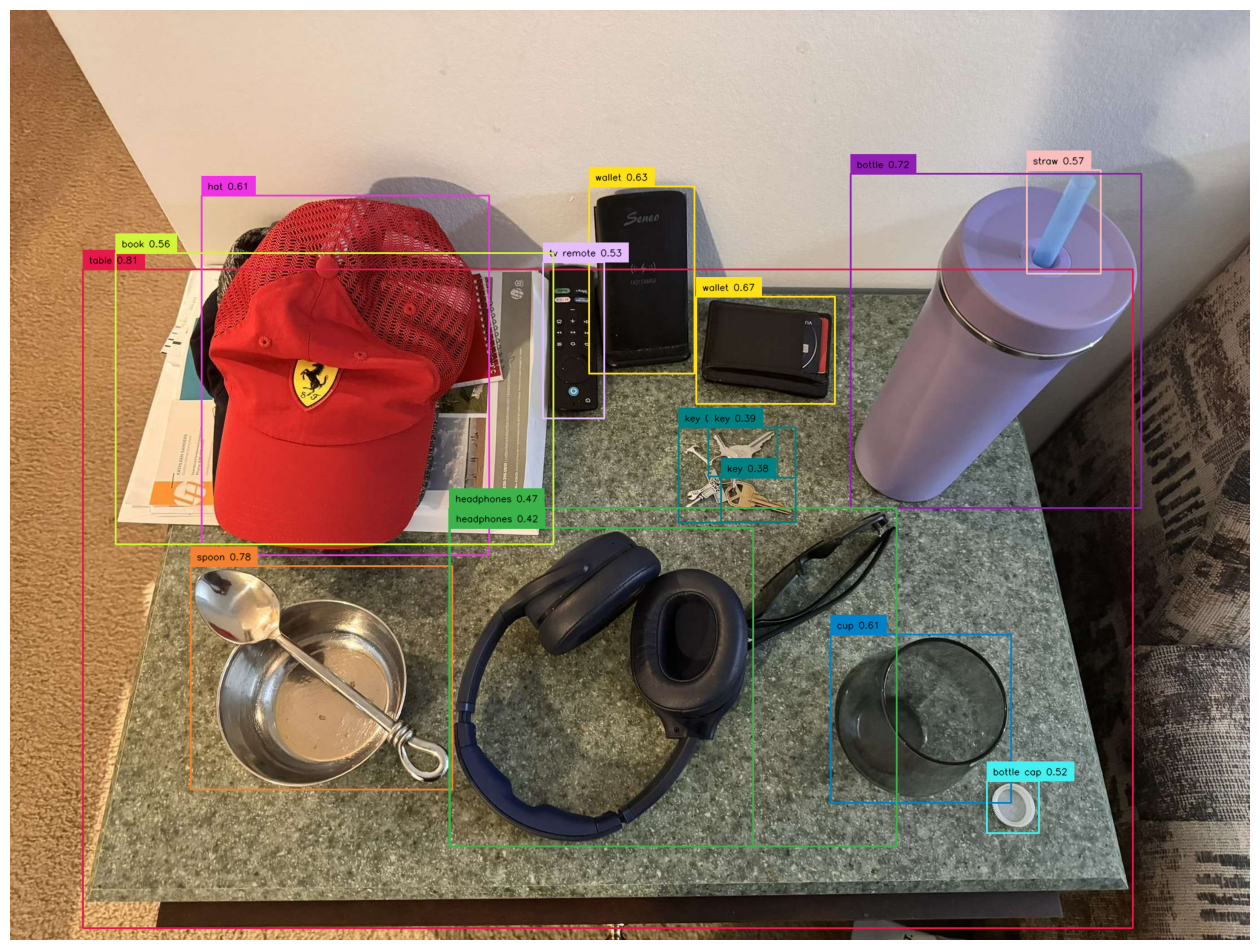

In [94]:
from typing import List

def enhance_class_name(class_names: List[str]) -> List[str]:
   return [
       f"all {class_name}s"
       for class_name
       in class_names
   ]
import cv2
import supervision as sv

# load image
image = cv2.imread(SOURCE_IMAGE_PATH)

# detect objects
detections = grounding_dino_model.predict_with_classes(
   image=image,
   classes=enhance_class_name(class_names=CLASSES),
   box_threshold=BOX_TRESHOLD,
   text_threshold=TEXT_TRESHOLD
)

# annotate image with detections
box_annotator = svn.BoxAnnotator()
labels = [
   f"{CLASSES[class_id]} {confidence:0.2f}"
   for _, _, confidence, class_id, _
   in detections]
annotated_frame = box_annotator.annotate(scene=image.copy(), detections=detections, labels=labels)

%matplotlib inline
svn.plot_image(annotated_frame, (16, 16))

In [127]:
from google.colab import files

# Upload the video file
uploaded = files.upload()

# Extract the file name of the uploaded video
video_file_name = next(iter(uploaded))


['requirements.txt', 'groundingdino', 'weights', 'README.md', 'setup.py', 'LICENSE', 'build', 'groundingdino.egg-info', '.gitignore', 'demo', '.asset', '.git', 'vid.mp4', 'data', 'vid (1).mp4', 'vid (2).mp4']


In [131]:
cap = cv2.VideoCapture('/content/GroundingDINO/vid (2).mp4')


In [136]:
from google.colab import files
from google.colab.patches import cv2_imshow
import cv2

# Upload the video file
uploaded = files.upload()

# Extract the file name of the uploaded video
video_file_name = next(iter(uploaded))

# Open the video file for reading
cap = cv2.VideoCapture(video_file_name)

# Get video properties
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

# Define the codec and create a VideoWriter object for MP4
fourcc = cv2.VideoWriter_fourcc(*'XVID')
output_video = cv2.VideoWriter('output.mp4', fourcc, 30.0, (frame_width, frame_height))


CLASSES1 = ['key','phone','bottle','tv remote']
BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.15

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Perform object detection on the frame (similar to your previous code).
    detections = grounding_dino_model.predict_with_classes(
        image=frame,
        classes=enhance_class_name(class_names=CLASSES1),
        box_threshold=BOX_TRESHOLD,
        text_threshold=TEXT_TRESHOLD
    )

    labels = [
        f"{CLASSES1[class_id] if class_id is not None else 'Unknown'} {confidence:0.2f}"
        for _, _, confidence, class_id, _
        in detections]

    # Annotate the frame with the detected objects.
    box_annotator = svn.BoxAnnotator()
    annotated_frame = box_annotator.annotate(scene=frame.copy(), detections=detections, labels=labels)

    # Write the annotated frame to the output video
    output_video.write(annotated_frame)

cap.release()
output_video.release()

# Download the output video
files.download('output.mp4')


Saving vid.mp4 to vid (4).mp4


/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:905: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:31: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>